## Import Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

## Data PreProcessing

In [93]:
path = "D:\CSE BRACU\CSE422\CSE422-Artificial-Intelligence-Project\FIFA Official dataset\FIFA22_official_data.csv"
df_raw = pd.read_csv(path)
df = df_raw.copy()

In [94]:
df.head()

ID             Name  Age  \
0  212198  Bruno Fernandes   26   
1  209658      L. Goretzka   26   
2  176580        L. Suárez   34   
3  192985     K. De Bruyne   30   
4  224334         M. Acuña   29   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/212/198/22_60.png    Portugal   
1  https://cdn.sofifa.com/players/209/658/22_60.png     Germany   
2  https://cdn.sofifa.com/players/176/580/22_60.png     Uruguay   
3  https://cdn.sofifa.com/players/192/985/22_60.png     Belgium   
4  https://cdn.sofifa.com/players/224/334/22_60.png   Argentina   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.com/flags/pt.png       88         89   
1  https://cdn.sofifa.com/flags/de.png       87         88   
2  https://cdn.sofifa.com/flags/uy.png       88         88   
3  https://cdn.sofifa.com/flags/be.png       91         91   
4  https://cdn.sofifa.com/flags/ar.png       84         84   

                 Club                                Club Logo  ...  \
0   Manchester United   https://cdn.sofifa.com/teams/11/30.png  ...   
1   FC Bayern München   https://cdn.sofifa.com/teams/21/30.png  ...   
2  Atlético de Madrid  https://cdn.sofifa.com/teams/240/30.png  ...   
3     Manchester City   https://cdn.sofifa.com/teams/10/30.png  ...   
4          Sevilla FC  https://cdn.sofifa.com/teams/481/30.png  ...   

  SlidingTackle GKDiving  GKHandling GKKicking  GKPositioning  GKReflexes  \
0          65.0       12          14        15              8          14   
1          77.0       13           8        15             11           9   
2          38.0       27          25        31             33          37   
3          53.0       15          13         5             10          13   
4          82.0        8          14        13             13          14   

   Best_Position Best_Overall_Rating Release_Clause DefensiveAwareness  
0            CAM                  88        €206.9M               72.0  
1             CM                  87        €160.4M               74.0  
2             ST                  88         €91.2M               42.0  
3             CM                  91        €232.2M               68.0  
4             LB                  84         €77.7M               80.0  

[5 rows x 65 columns]

In [95]:
df.shape

(16736, 65)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16736 entries, 0 to 16735
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16736 non-null  int64  
 1   Name                      16736 non-null  object 
 2   Age                       16736 non-null  int64  
 3   Photo                     16736 non-null  object 
 4   Nationality               16736 non-null  object 
 5   Flag                      16736 non-null  object 
 6   Overall                   16736 non-null  int64  
 7   Potential                 16736 non-null  int64  
 8   Club                      16472 non-null  object 
 9   Club Logo                 16736 non-null  object 
 10  Value                     16736 non-null  object 
 11  Wage                      16736 non-null  object 
 12  Special                   16736 non-null  int64  
 13  Preferred_Foot            16736 non-null  object 
 14  Intern

In [97]:
numerical_null = []
categorical_null = []
for column in list(df.columns):
    null_values = sum(df[column].isnull())
    if null_values:
        print(f"{column} -- {null_values} -- {df[column].dtype}")
        if df[column].dtype == 'float64':
            numerical_null.append(column)
        else:
            categorical_null.append(column)


Club -- 264 -- object
Body_Type -- 29 -- object
Real_Face -- 29 -- object
Position -- 26 -- object
Jersey_Number -- 26 -- float64
Joined -- 1514 -- object
Loaned_From -- 15602 -- object
Contract_Valid_Until -- 351 -- object
Volleys -- 37 -- float64
Curve -- 37 -- float64
Agility -- 37 -- float64
Balance -- 37 -- float64
Jumping -- 37 -- float64
Interceptions -- 8 -- float64
Positioning -- 8 -- float64
Vision -- 37 -- float64
Composure -- 252 -- float64
Marking -- 15843 -- float64
SlidingTackle -- 37 -- float64
Release_Clause -- 1752 -- object
DefensiveAwareness -- 893 -- float64


In [98]:
for column in list(df.columns):
    null_values_perc = ((df[column].isnull().sum())/df.shape[0])*100
    if null_values_perc > 30:
        print(f"{column} -- {null_values_perc} -- {df[column].dtype}")

Loaned_From -- 93.22418738049714 -- object
Marking -- 94.66419694072657 -- float64


In [99]:
to_drop = ['Loaned_From', 'Marking']
df.drop(columns=to_drop, inplace=True)

numerical_null.remove('Marking')
categorical_null.remove('Loaned_From')

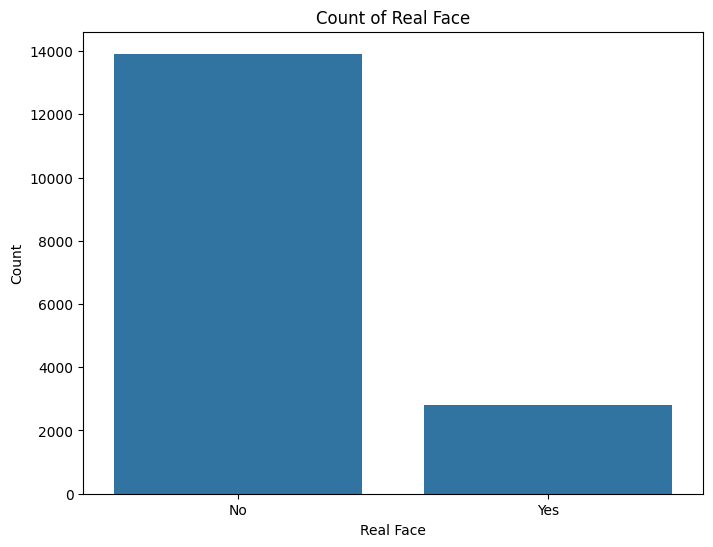

In [100]:
value_counts = df['Real_Face'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Count of Real Face')
plt.xlabel('Real Face')
plt.ylabel('Count')
plt.show()

In [101]:
to_drop = ['Real_Face']
df.drop(columns=to_drop, inplace=True)
categorical_null.remove('Real_Face')

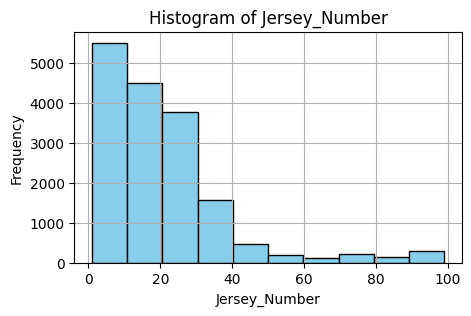

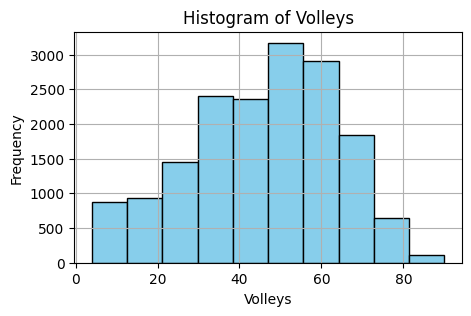

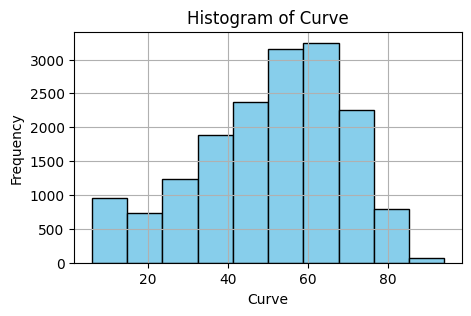

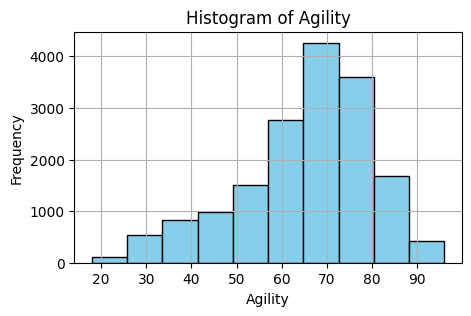

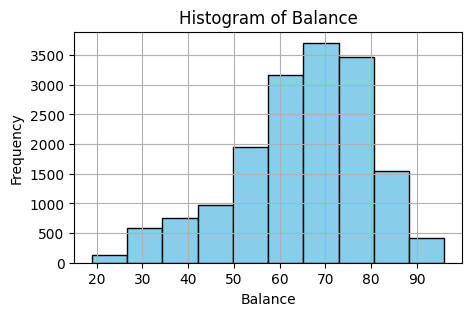

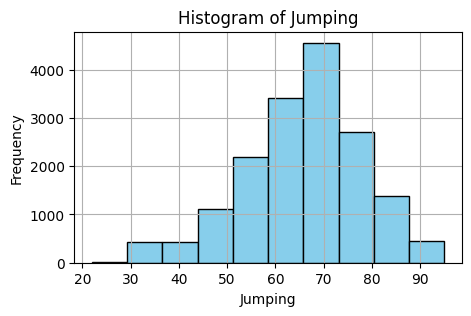

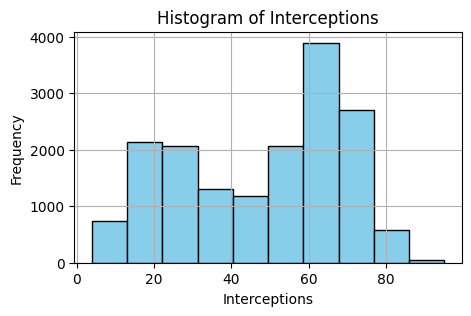

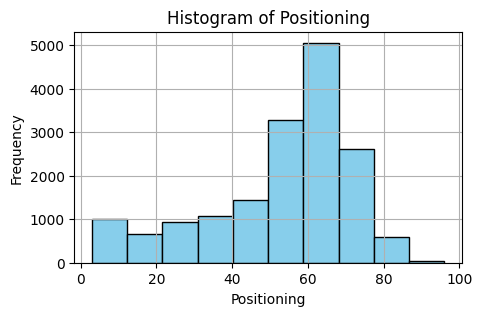

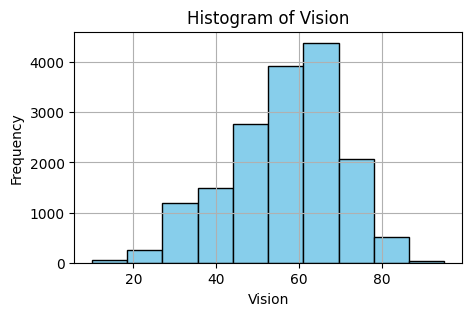

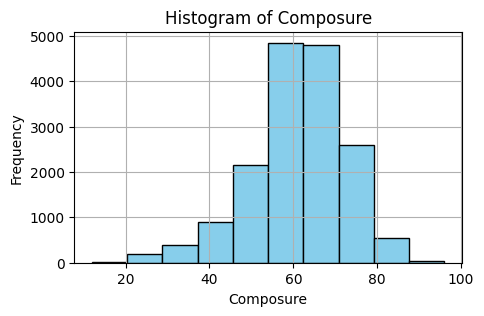

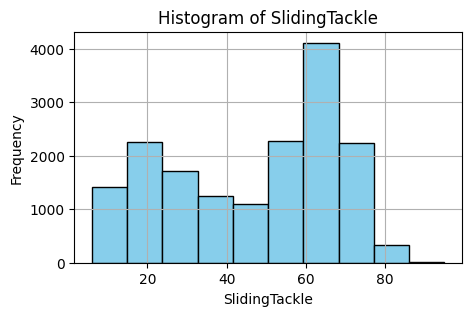

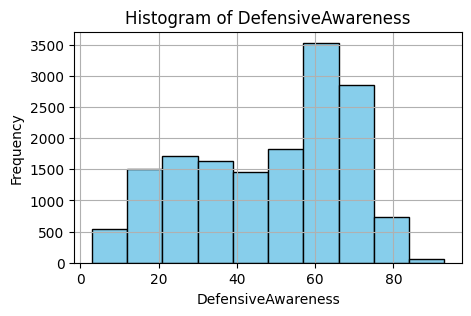

In [102]:
for column in numerical_null:
    plt.figure(figsize=(5, 3))
    df[column].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [103]:
print(numerical_null)

['Jersey_Number', 'Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Interceptions', 'Positioning', 'Vision', 'Composure', 'SlidingTackle', 'DefensiveAwareness']


In [104]:
for col in numerical_null:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(np.abs(df[col].mean())) 

In [105]:
for column in list(df.columns):
    null_values = sum(df[column].isnull())
    if null_values:
        print(f"{column} -- {null_values} -- {df[column].dtype}")

Club -- 264 -- object
Body_Type -- 29 -- object
Position -- 26 -- object
Joined -- 1514 -- object
Contract_Valid_Until -- 351 -- object
Release_Clause -- 1752 -- object


In [106]:
# Convert the difference of 'Joined' and 'Contract Valid Until'
df['Contract_Duration'] = 0.0
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\1176558440.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Joined'] = pd.to_datetime(df['Joined']).dt.year


In [107]:
for i in range(0,len(df['Contract_Duration'])):
    if pd.isna(df['Joined'][i]) == False:
        duration = abs(df['Joined'][i] - int(df['Contract_Valid_Until'][i]))
        df['Contract_Duration'][i] = duration

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\1829747579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract_Duration'][i] = duration
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\1829747579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract_Duration'][i] = duration
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\1829747579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract_Duration'][

In [108]:
df['Contract_Duration'] 

0         5.0
1         8.0
2         2.0
3        10.0
4         4.0
         ... 
16731     0.0
16732     4.0
16733     2.0
16734     2.0
16735     6.0
Name: Contract_Duration, Length: 16736, dtype: float64

In [109]:
duplicate_count = df.duplicated(subset=['Name']).sum()
print("Number of rows with duplicate names:", duplicate_count)

Number of rows with duplicate names: 647


In [110]:
df.drop_duplicates(subset=['Name'], inplace=True)

In [111]:
duplicate_count = df.duplicated(subset=['Name']).sum()
print("Number of rows with duplicate names:", duplicate_count)

Number of rows with duplicate names: 0


In [112]:
df.shape

(16089, 63)

In [113]:
to_drop = ['ID','Name','Photo', 'Flag', 'Club Logo', 'Position', 'Joined','Contract_Valid_Until']
df.drop(columns=to_drop, inplace=True)

In [114]:
df.dropna(inplace=True)

In [115]:
for column in list(df.columns):
    null_values = sum(df[column].isnull())
    if null_values:
        print(f"{column} -- {null_values} -- {df[column].dtype}")

In [116]:
df.shape

(14385, 55)

In [117]:
def convert_currency_to_number(x):
    output = x.replace('€','')
    if 'M' in x:
        output = output.replace('M','')
        output = float(output) * 1000000
    elif 'K' in x:
        output = output.replace('K','')
        output = float(output) * 1000
    output = int(output)
    return output

df['Value'] = df['Value'].apply(convert_currency_to_number)
df['Wage'] = df['Wage'].apply(convert_currency_to_number)
df['Release_Clause'] = df['Release_Clause'].apply(convert_currency_to_number)

In [118]:
def convert_to_num(x):
    return float(x[:-2])

df['Height'] = df['Height'].apply(convert_to_num)
df['Weight'] = df['Weight'].apply(convert_to_num)

In [119]:
def convert_work_rate(x):
    attack_work_rate, defend_work_rate = x.split('/')
    return attack_work_rate, defend_work_rate

In [120]:
df[['Attack_Work_Rate', 'Defend_Work_Rate']] = df['Work_Rate'].str.split('/ ', expand=True)
df.drop(columns='Work_Rate', inplace=True)
df.head()

Age Nationality  Overall  Potential                Club      Value    Wage  \
0   26    Portugal       88         89   Manchester United  107500000  250000   
1   26     Germany       87         88   FC Bayern München   93000000  140000   
2   34     Uruguay       88         88  Atlético de Madrid   44500000  135000   
3   30     Belgium       91         91     Manchester City  125500000  350000   
4   29   Argentina       84         84          Sevilla FC   37000000   45000   

   Special Preferred_Foot  International_Reputation  ...  GKKicking  \
0     2341          Right                         3  ...         15   
1     2314          Right                         4  ...         15   
2     2307          Right                         5  ...         31   
3     2304          Right                         4  ...          5   
4     2292           Left                         2  ...         13   

   GKPositioning GKReflexes  Best_Position  Best_Overall_Rating  \
0              8         14            CAM                   88   
1             11          9             CM                   87   
2             33         37             ST                   88   
3             10         13             CM                   91   
4             13         14             LB                   84   

   Release_Clause  DefensiveAwareness  Contract_Duration  Attack_Work_Rate  \
0       206900000                72.0                5.0              High   
1       160400000                74.0                8.0              High   
2        91200000                42.0                2.0              High   
3       232200000                68.0               10.0              High   
4        77700000                80.0                4.0              High   

   Defend_Work_Rate  
0              High  
1            Medium  
2            Medium  
3              High  
4              High  

[5 rows x 56 columns]

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14385 entries, 0 to 16708
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14385 non-null  int64  
 1   Nationality               14385 non-null  object 
 2   Overall                   14385 non-null  int64  
 3   Potential                 14385 non-null  int64  
 4   Club                      14385 non-null  object 
 5   Value                     14385 non-null  int64  
 6   Wage                      14385 non-null  int64  
 7   Special                   14385 non-null  int64  
 8   Preferred_Foot            14385 non-null  object 
 9   International_Reputation  14385 non-null  int64  
 10  Weak_Foot                 14385 non-null  int64  
 11  Skill_Moves               14385 non-null  int64  
 12  Body_Type                 14385 non-null  object 
 13  Jersey_Number             14385 non-null  float64
 14  Height     

In [122]:
df['Club'].nunique()

832

In [123]:
df['Nationality'].nunique()

166

In [124]:
to_drop = ['Club']
df.drop(columns=to_drop, inplace=True)

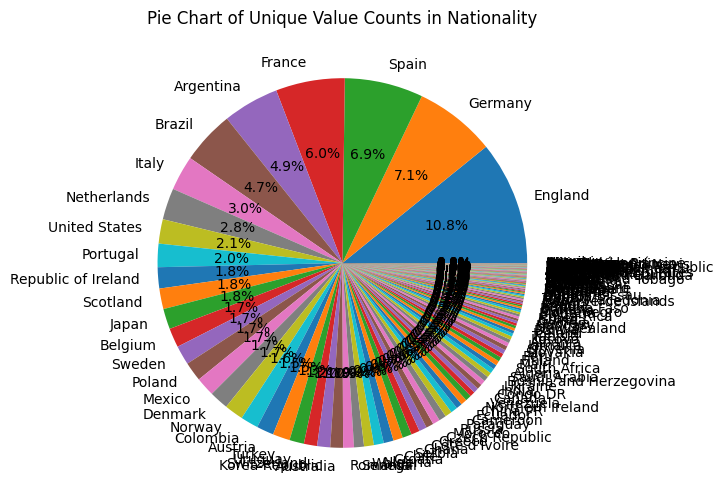

In [125]:
value_counts = df['Nationality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Unique Value Counts in Nationality')
plt.show()

In [126]:
counts = df['Nationality'].value_counts() / df.shape[0]
idx = counts[counts.lt(0.02)].index

df.loc[df['Nationality'].isin(idx), 'Nationality'] = 'Others'

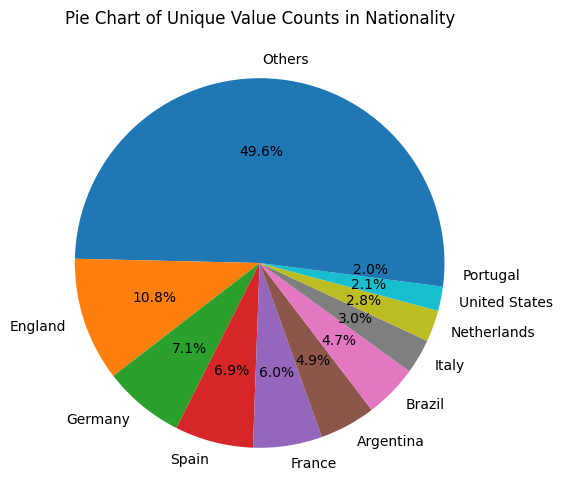

In [127]:
value_counts = df['Nationality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Unique Value Counts in Nationality')
plt.show()

In [128]:
print(df['Best_Position'].nunique())
print(df['Best_Position'].unique())

15
['CAM' 'CM' 'ST' 'LB' 'CDM' 'CB' 'RB' 'LM' 'RW' 'LW' 'CF' 'LWB' 'RM' 'RWB'
 'GK']


In [129]:
df.loc[df['Best_Position'].isin(('CF', 'ST')),'Best_Position'] = 'ST'
df.loc[df['Best_Position'].isin(('LW', 'RW', 'LM', 'RM')),'Best_Position'] = 'WI'
df.loc[df['Best_Position'].isin(('RB', 'LB', 'RWB', 'LWB')),'Best_Position'] = 'FB'

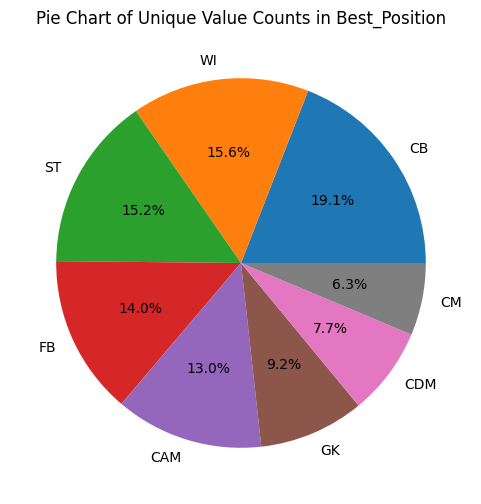

In [130]:
value_counts = df['Best_Position'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Unique Value Counts in Best_Position')
plt.show()

In [131]:
print(df['Best_Position'].nunique())
print(df['Best_Position'].unique())

8
['CAM' 'CM' 'ST' 'FB' 'CDM' 'CB' 'WI' 'GK']


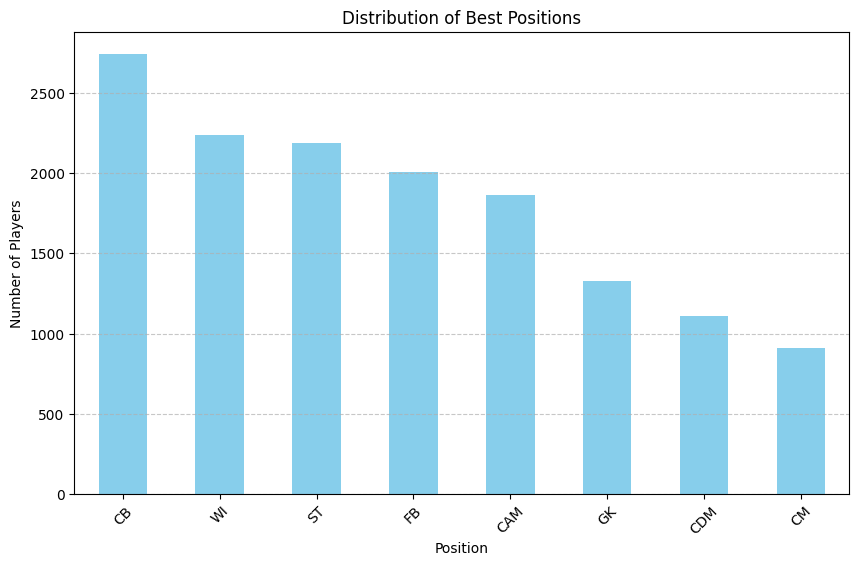

In [132]:
position_counts = df['Best_Position'].value_counts()

plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Best Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

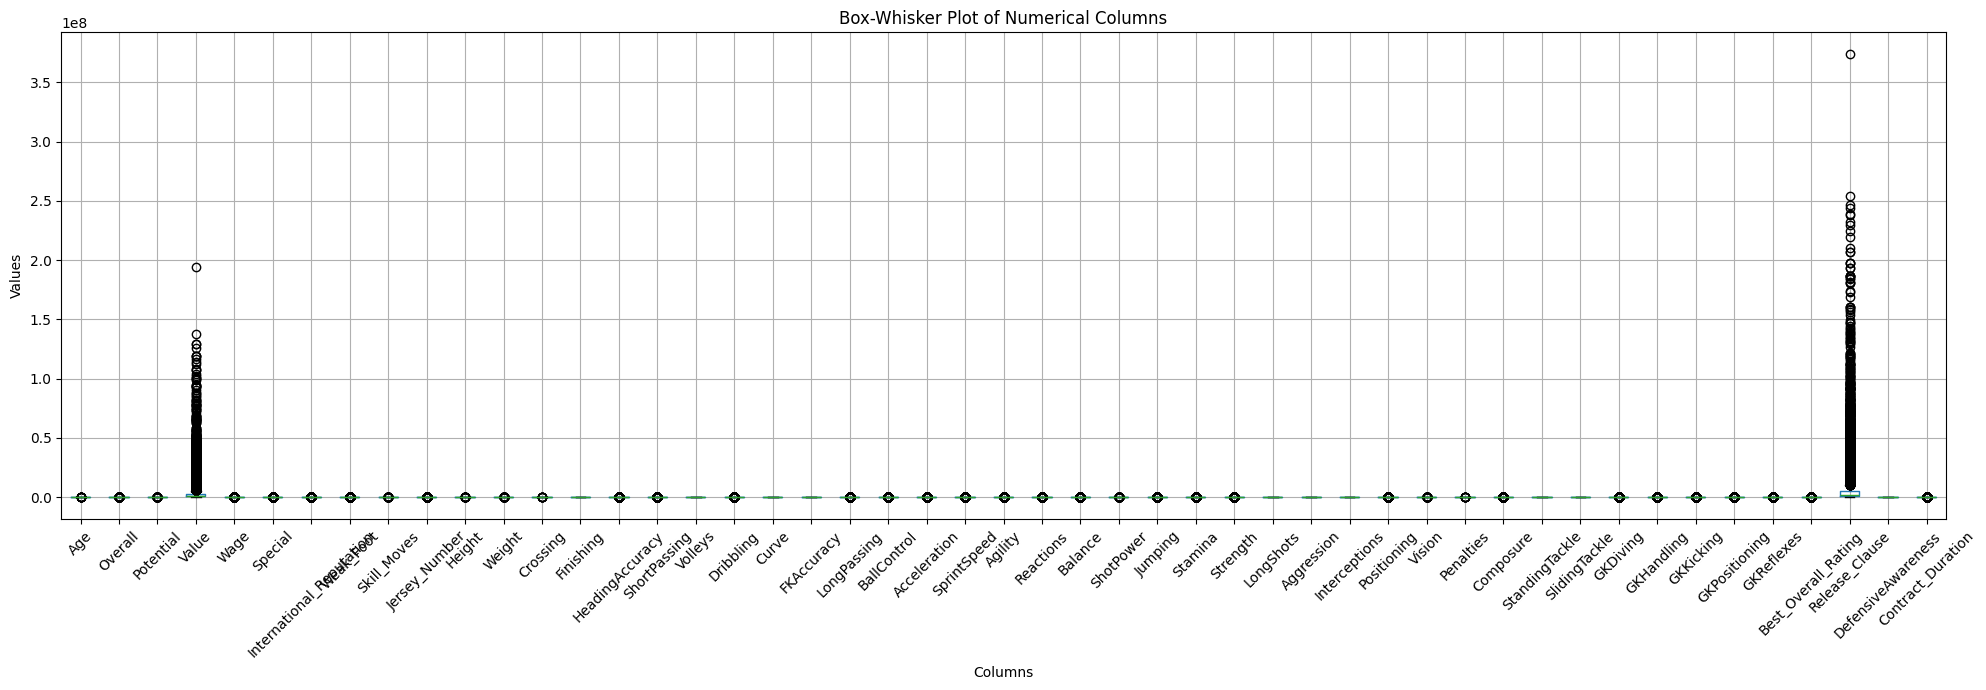

In [133]:
numerical_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 7))
numerical_cols.boxplot()
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box-Whisker Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [134]:
df['Value'].max()

194000000

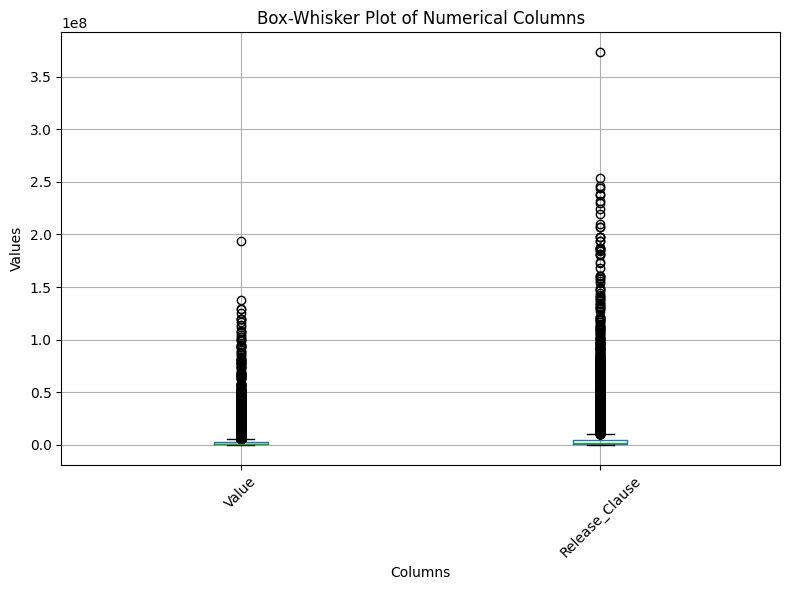

In [135]:
outliner_column = ['Value', 'Release_Clause']

plt.figure(figsize=(8, 6))
df[outliner_column].boxplot()
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box-Whisker Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\3063910052.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column_name], shade=True, ax=axes[1])


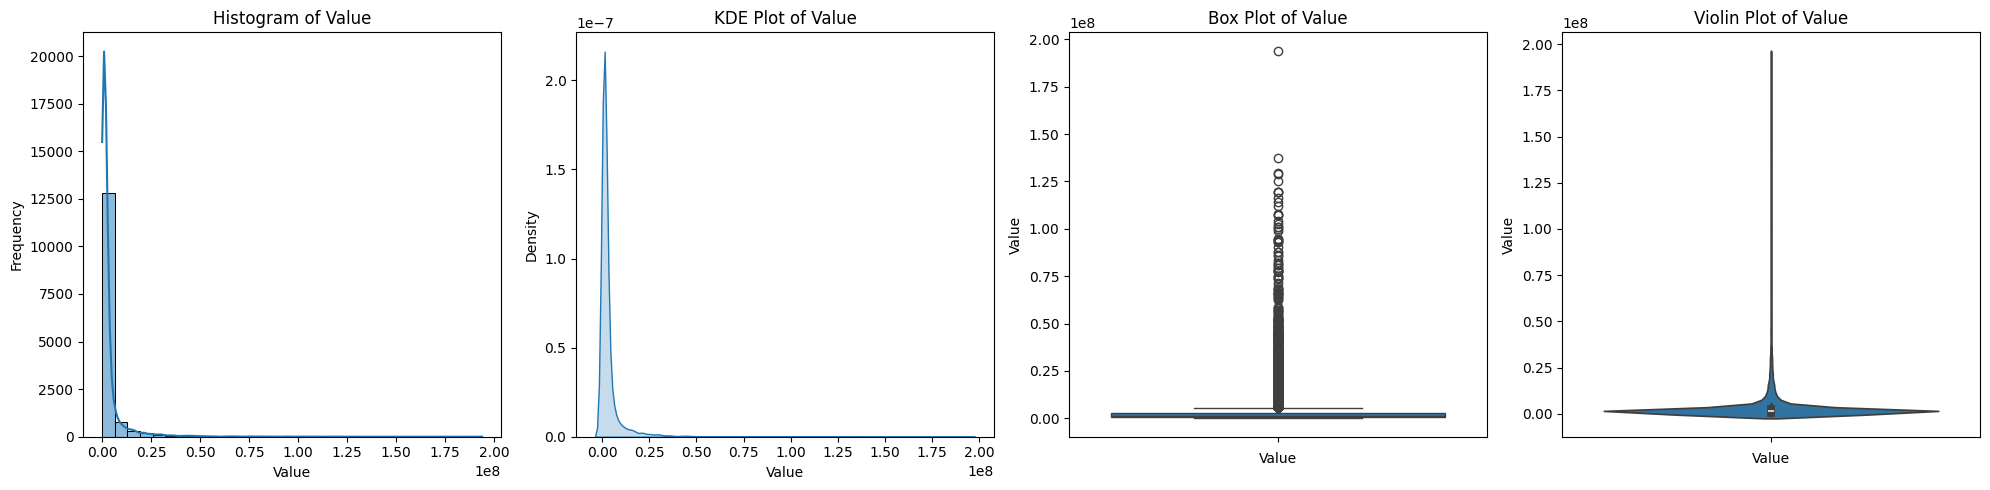

In [136]:
column_name = outliner_column[0]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Histogram
sns.histplot(df[column_name], bins=30, kde=True, ax=axes[0], binwidth=None)
axes[0].set_title('Histogram of {}'.format(column_name))
axes[0].set_xlabel(column_name)
axes[0].set_ylabel('Frequency')

# KDE Plot
sns.kdeplot(df[column_name], shade=True, ax=axes[1])
axes[1].set_title('KDE Plot of {}'.format(column_name))
axes[1].set_xlabel(column_name)
axes[1].set_ylabel('Density')

# Box Plot
sns.boxplot(df[column_name], ax=axes[2])
axes[2].set_title('Box Plot of {}'.format(column_name))
axes[2].set_xlabel(column_name)

# Violin Plot
sns.violinplot(df[column_name], ax=axes[3])
axes[3].set_title('Violin Plot of {}'.format(column_name))
axes[3].set_xlabel(column_name)

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7244\2200612415.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column_name], shade=True, ax=axes[1])


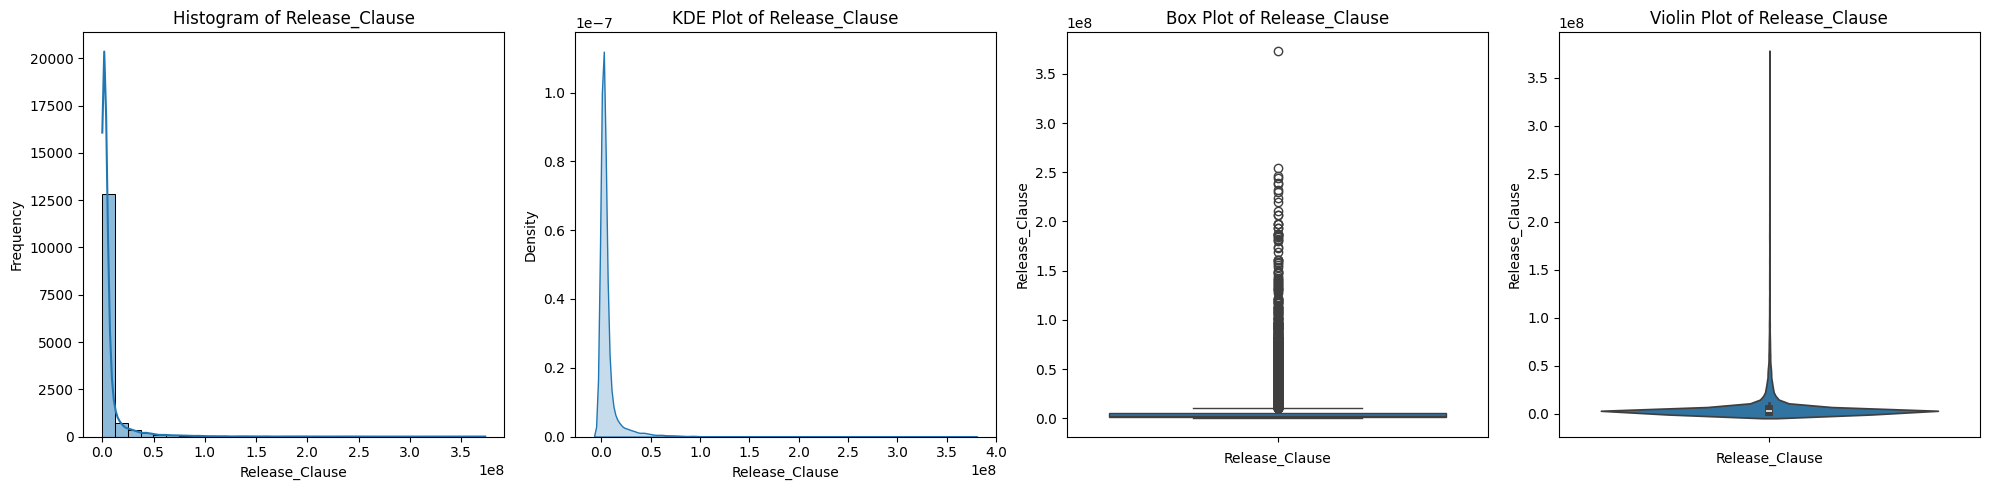

In [137]:
column_name = outliner_column[1]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Histogram
sns.histplot(df[column_name], bins=30, kde=True, ax=axes[0], binwidth=None)
axes[0].set_title('Histogram of {}'.format(column_name))
axes[0].set_xlabel(column_name)
axes[0].set_ylabel('Frequency')

# KDE Plot
sns.kdeplot(df[column_name], shade=True, ax=axes[1])
axes[1].set_title('KDE Plot of {}'.format(column_name))
axes[1].set_xlabel(column_name)
axes[1].set_ylabel('Density')

# Box Plot
sns.boxplot(df[column_name], ax=axes[2])
axes[2].set_title('Box Plot of {}'.format(column_name))
axes[2].set_xlabel(column_name)

# Violin Plot
sns.violinplot(df[column_name], ax=axes[3])
axes[3].set_title('Violin Plot of {}'.format(column_name))
axes[3].set_xlabel(column_name)

plt.tight_layout()
plt.show()

In [138]:
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

In [139]:
df['Nationality'] = label_encoder.fit_transform(df[['Nationality']])
df['Body_Type'] = label_encoder.fit_transform(df[['Body_Type']])
df['Best_Position'] = label_encoder.fit_transform(df[['Best_Position']])
df['Preferred_Foot'] = label_encoder.fit_transform(df[['Preferred_Foot']])

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-v

In [140]:
df['Attack_Work_Rate'] = ordinal_encoder.fit_transform(df[['Attack_Work_Rate']])
df['Defend_Work_Rate'] = ordinal_encoder.fit_transform(df[['Defend_Work_Rate']])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14385 entries, 0 to 16708
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14385 non-null  int64  
 1   Nationality               14385 non-null  int32  
 2   Overall                   14385 non-null  int64  
 3   Potential                 14385 non-null  int64  
 4   Value                     14385 non-null  int64  
 5   Wage                      14385 non-null  int64  
 6   Special                   14385 non-null  int64  
 7   Preferred_Foot            14385 non-null  int32  
 8   International_Reputation  14385 non-null  int64  
 9   Weak_Foot                 14385 non-null  int64  
 10  Skill_Moves               14385 non-null  int64  
 11  Body_Type                 14385 non-null  int32  
 12  Jersey_Number             14385 non-null  float64
 13  Height                    14385 non-null  float64
 14  Weight     

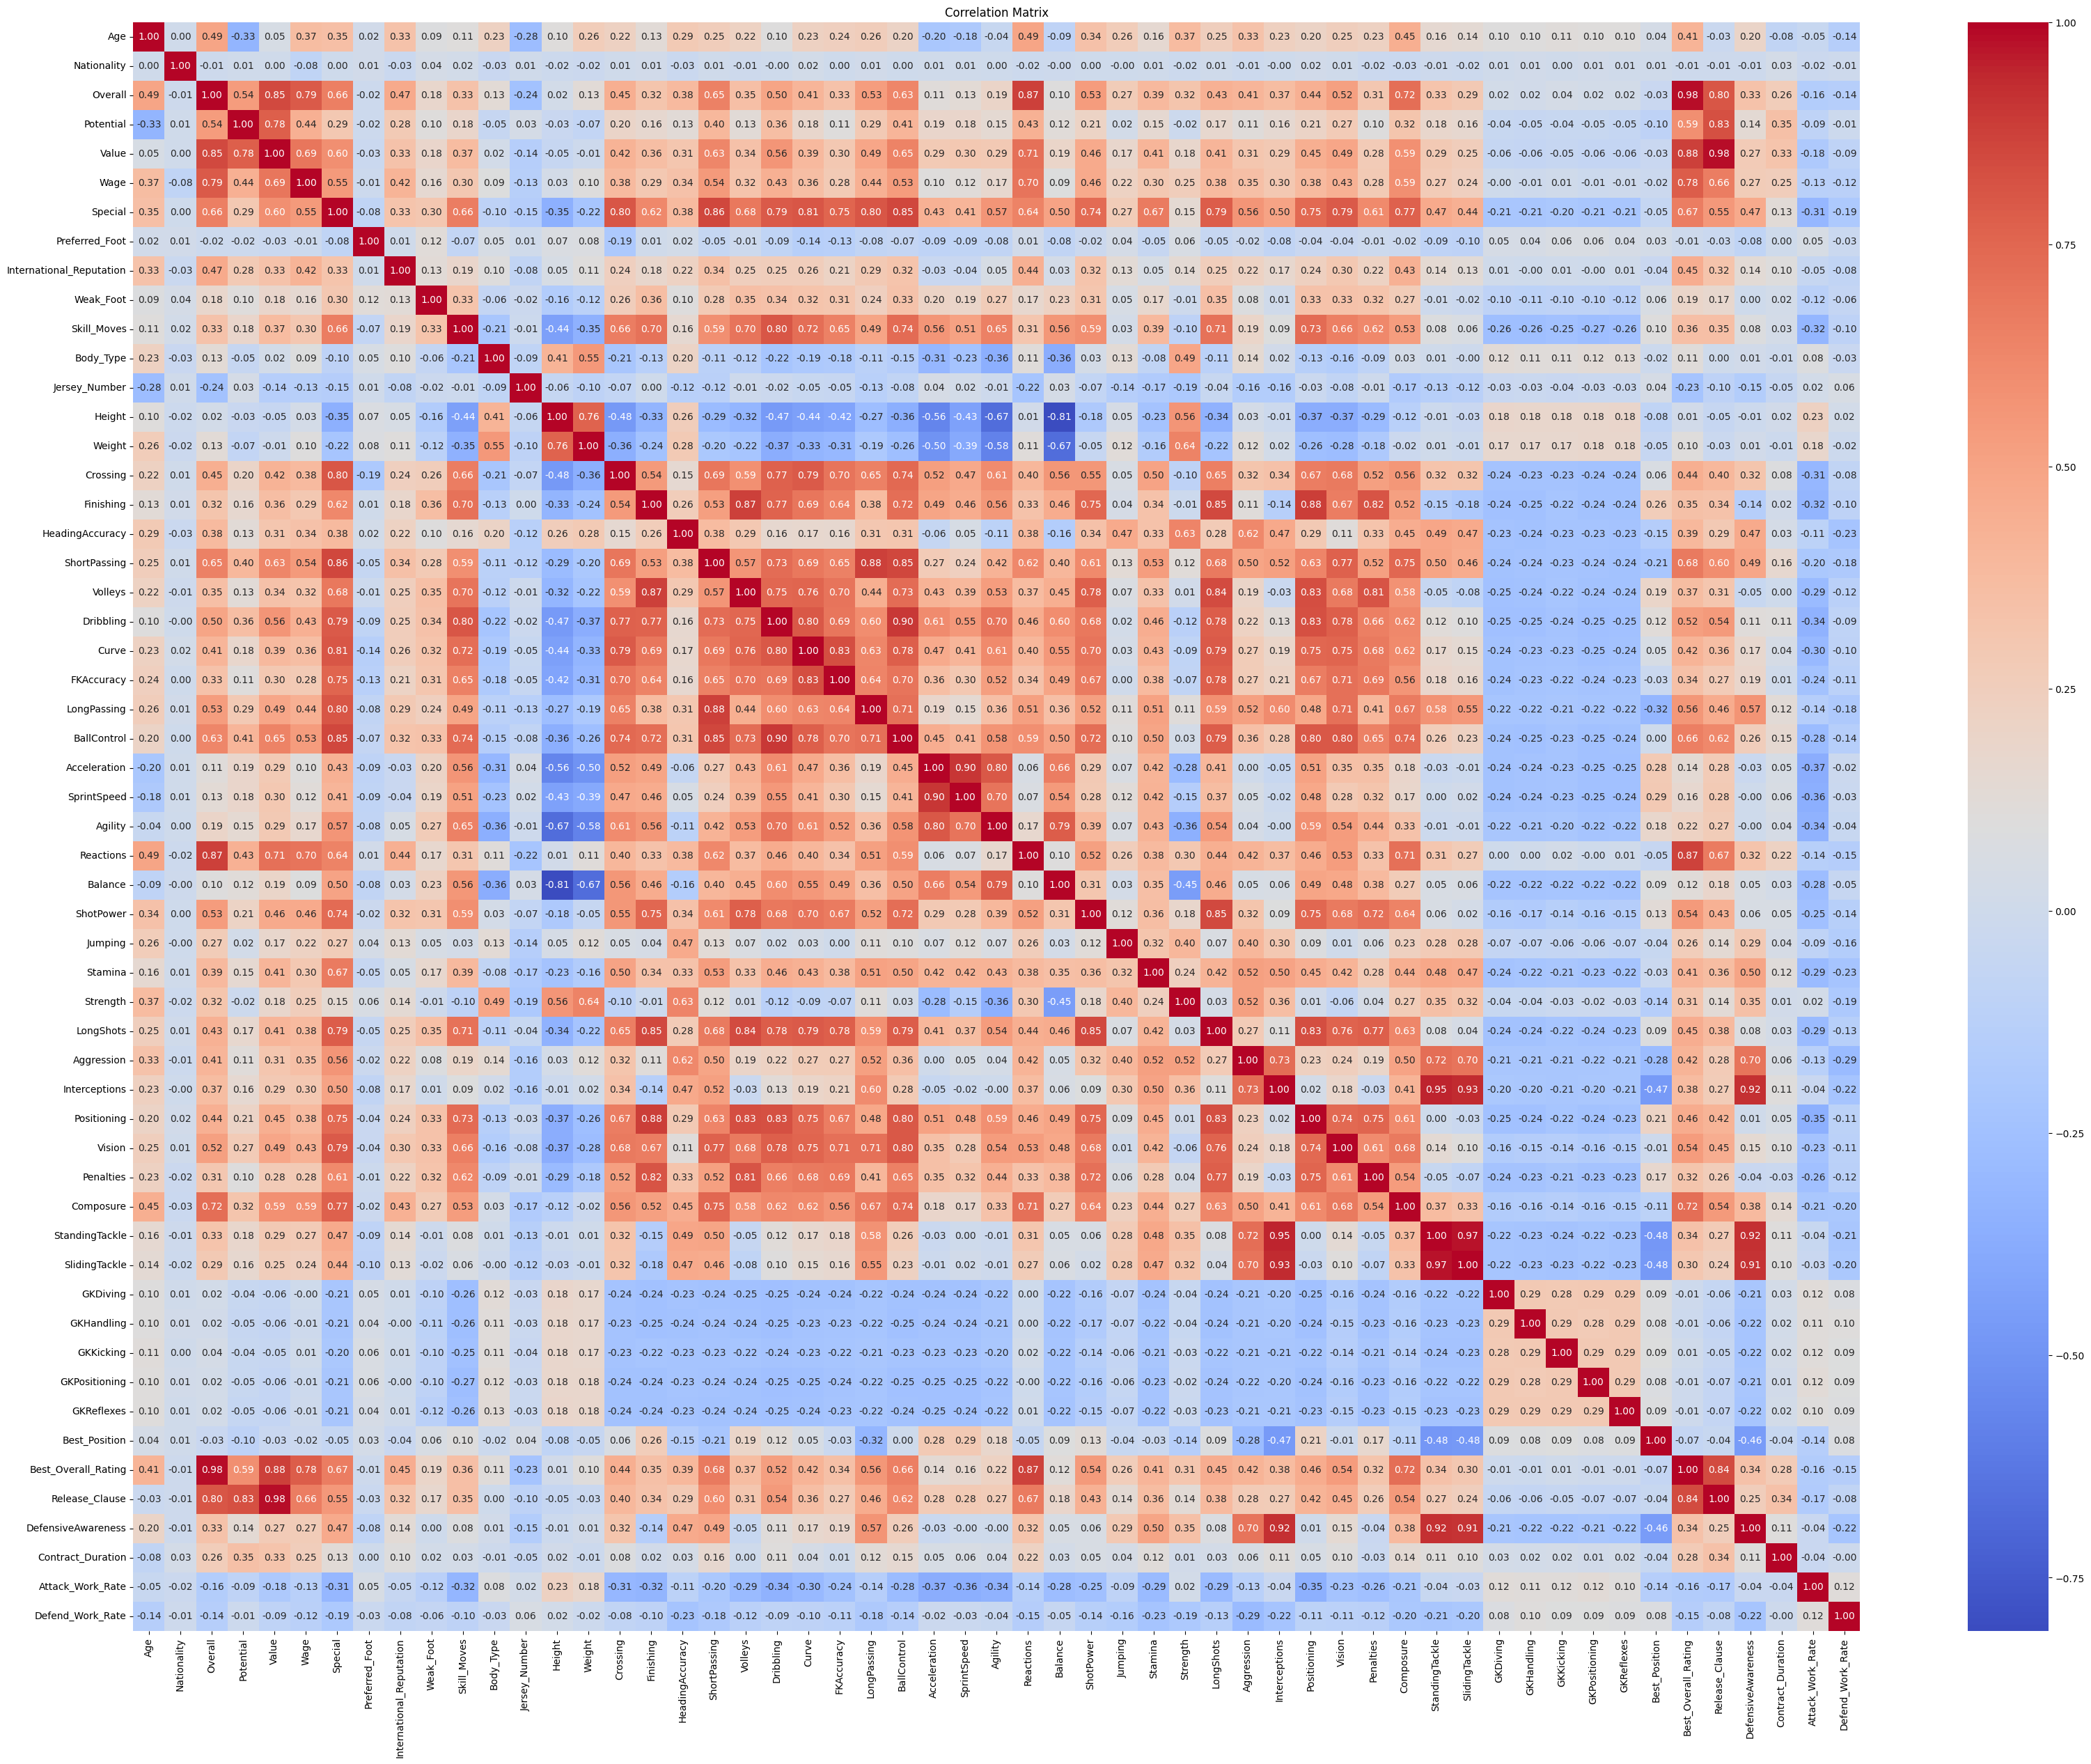

In [142]:
spearman_corr = df.corr(method='spearman')

plt.figure(figsize=(40, 30))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [143]:
y = df['Best_Position']
X = df.drop(columns='Best_Position')

In [144]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### SMOTE for data balancing

In [145]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

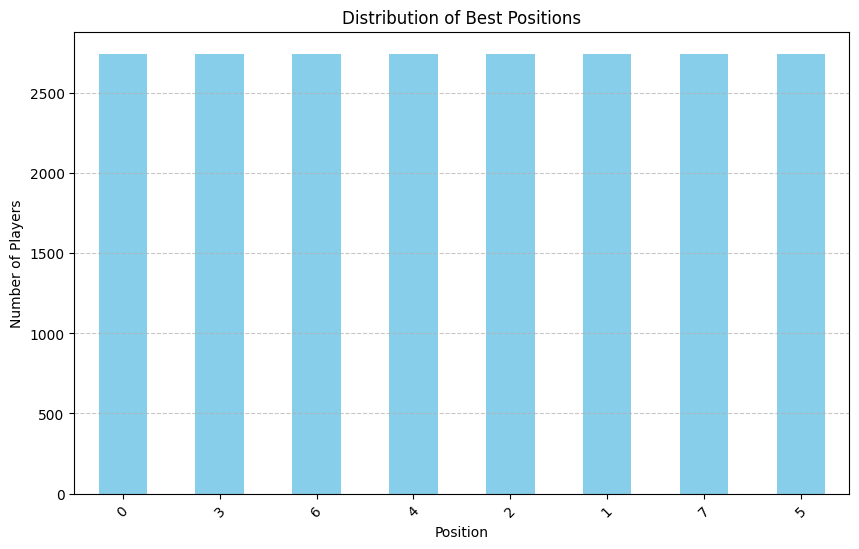

In [146]:
position_counts = y_resampled.value_counts()

# Plotting
plt.figure(figsize=(8, 5))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Best Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Train Test Split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)
print(X_train.shape)
print(X_test.shape)

(17568, 54)
(4392, 54)


## Model Training

In [148]:
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')       # Specify 'average' parameter
    recall = recall_score(y_test, y_pred, average='weighted')             # Specify 'average' parameter
    f1 = f1_score(y_test, y_pred, average='weighted')                      # Specify 'average' parameter
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Compute and Plotting learning curve
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()
    
    # Return evaluation metrics
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_mat
    }

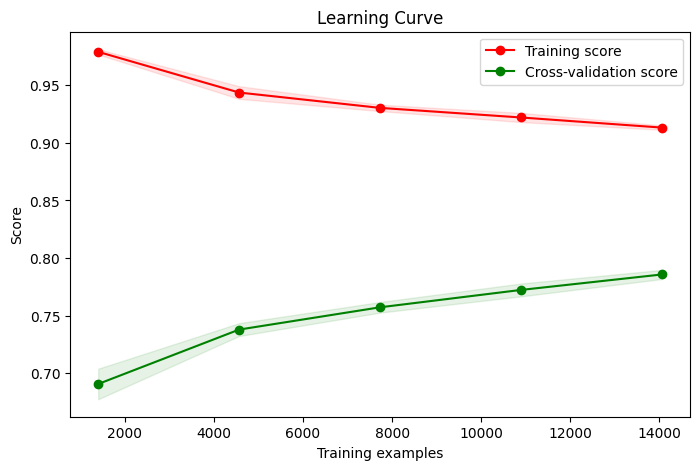

Accuracy = 0.793943533697632
Precision = 0.795702656755994
Recall = 0.793943533697632
F1 Score = 0.7936577117068189
Confusion Matrix = [[350   0  14  73   7   0  17  75]
 [  2 463  41   4  56   0   1   1]
 [  3  20 441  68  20   0   0   2]
 [ 58   6  64 437   9   0   0   7]
 [  0  23  30  16 438   0   1  13]
 [  0   0   0   0   0 547   0   0]
 [ 28   0   1   4   1   0 474  31]
 [101   4   5  25  28   0  46 337]]


In [149]:
dtree = DecisionTreeClassifier(max_depth=12)
dtrer_ev = evaluate_model(dtree, X_train, y_train, X_test, y_test)

for name, perc in dtrer_ev.items():
    print(f'{name} = {perc}')

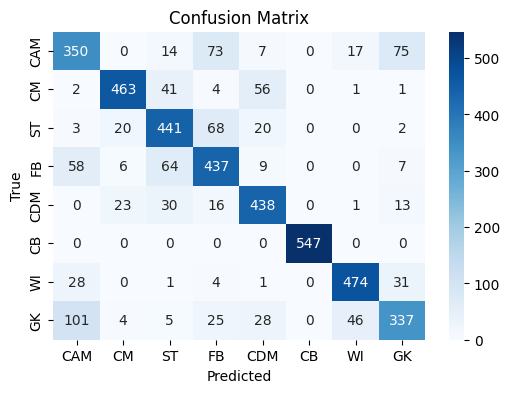

In [158]:
dt_cm = dtrer_ev['Confusion Matrix']

plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'],
            yticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

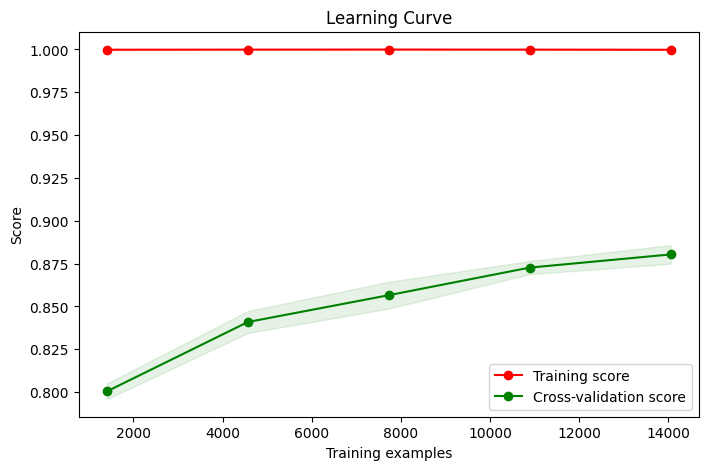

Accuracy = 0.8852459016393442
Precision = 0.8858390189311312
Recall = 0.8852459016393442
F1 Score = 0.8845146231124215
Confusion Matrix = [[405   0   3  44   3   0  13  68]
 [  2 488  34   4  40   0   0   0]
 [  0   9 502  33  10   0   0   0]
 [ 17   0  22 541   1   0   0   0]
 [  0  15  17   5 481   0   0   3]
 [  0   0   0   0   0 547   0   0]
 [  8   1   2   5   0   0 502  21]
 [ 62   0   2   8  24   0  28 422]]


In [150]:
rfc = RandomForestClassifier(n_estimators=30)
rfc_ev = evaluate_model(rfc, X_train, y_train, X_test, y_test)

for name, perc in rfc_ev.items():
    print(f'{name} = {perc}')

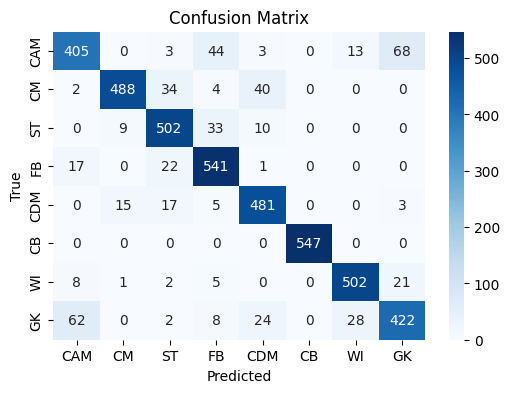

In [159]:
rfc_cm = rfc_ev['Confusion Matrix']

plt.figure(figsize=(6, 4))
sns.heatmap(rfc_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'],
            yticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

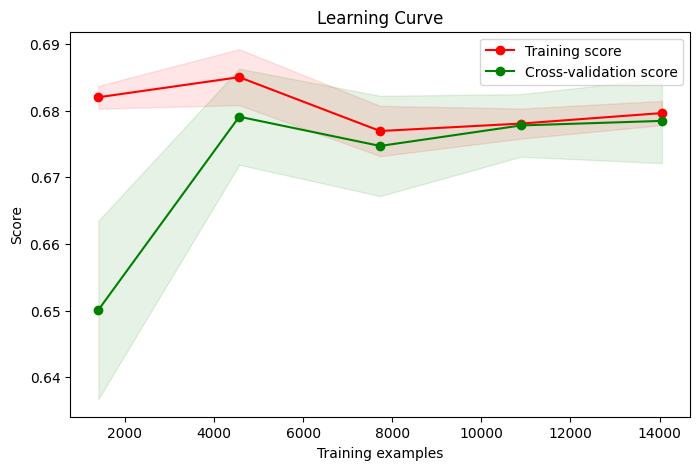

Accuracy = 0.6707650273224044
Precision = 0.678473838516849
Recall = 0.6707650273224044
F1 Score = 0.6714191507487143
Confusion Matrix = [[285   0  22  51  23   0  22 133]
 [  1 420  79  11  57   0   0   0]
 [  2  39 337 120  56   0   0   0]
 [ 33   1 186 285  67   0   0   9]
 [  2  42  77  43 357   0   0   0]
 [  0   0   0   0   0 547   0   0]
 [ 15   1   9   7   1   0 463  43]
 [144   1  19  21  52   0  57 252]]


In [151]:
nb_clf = MultinomialNB()
nb_ev = evaluate_model(nb_clf, X_train, y_train, X_test, y_test)

for name, perc in nb_ev.items():
    print(f'{name} = {perc}')

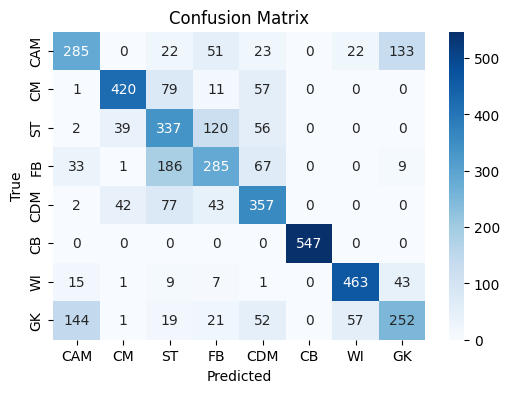

In [160]:
nb_cm = nb_ev['Confusion Matrix']

plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'],
            yticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

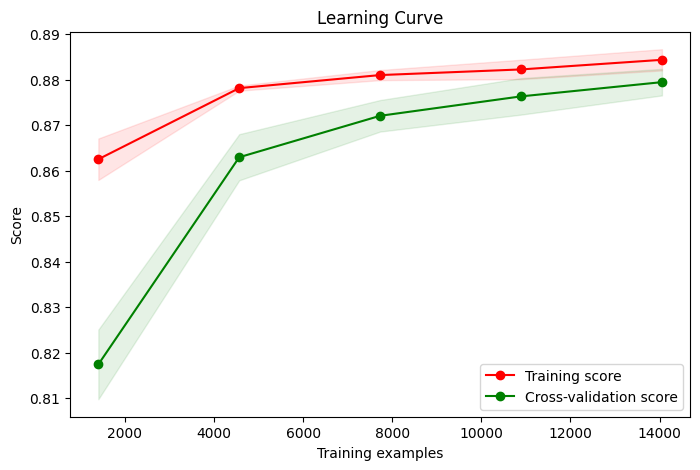

Accuracy = 0.8743169398907104
Precision = 0.8758964635783923
Recall = 0.8743169398907104
F1 Score = 0.8740562210461565
Confusion Matrix = [[399   0   2  59   0   0  14  62]
 [  1 497  35   2  33   0   0   0]
 [  0  11 478  53  12   0   0   0]
 [ 15   1  56 497   6   0   0   6]
 [  1  10  15   4 489   0   0   2]
 [  0   0   0   0   0 547   0   0]
 [  8   1   1   5   0   0 506  18]
 [ 58   0   0  15  23   0  23 427]]


In [152]:
logistic_clf = LogisticRegression()
log_ev = evaluate_model(logistic_clf, X_train, y_train, X_test, y_test)

for name, perc in log_ev.items():
    print(f'{name} = {perc}')

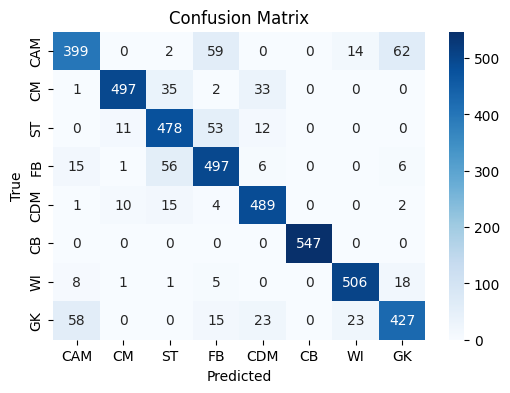

In [161]:
log_cm = log_ev['Confusion Matrix']

plt.figure(figsize=(6, 4))
sns.heatmap(log_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'],
            yticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

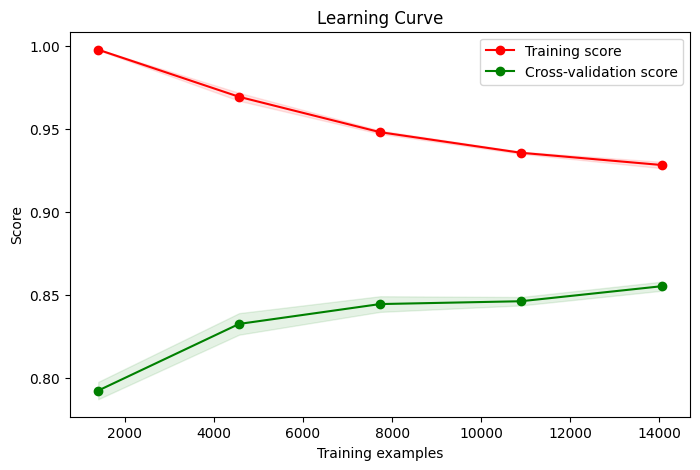

Accuracy = 0.8515482695810564
Precision = 0.8556772910104631
Recall = 0.8515482695810564
F1 Score = 0.851634919937884
Confusion Matrix = [[375   0   6  74   3   0  10  68]
 [  0 484  40   3  41   0   0   0]
 [  1   6 455  78  14   0   0   0]
 [ 16   0  65 490   8   0   1   1]
 [  0   9  22   6 481   0   0   3]
 [  0   0   0   0   0 547   0   0]
 [ 10   0   1   6   1   0 499  22]
 [ 66   0   3  14  27   0  27 409]]


In [153]:
xgb_clf = XGBClassifier(n_estimators=10)
xgb_ev = evaluate_model(xgb_clf, X_train, y_train, X_test, y_test)

for name, perc in xgb_ev.items():
    print(f'{name} = {perc}')

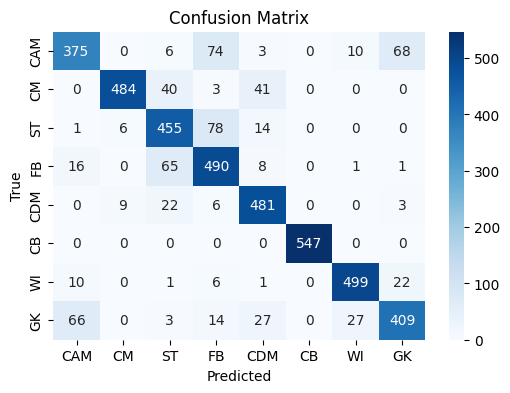

In [162]:
xgb_cm = xgb_ev['Confusion Matrix']

plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'],
            yticklabels=['CAM', 'CM', 'ST', 'FB', 'CDM', 'CB', 'WI', 'GK'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Comparison

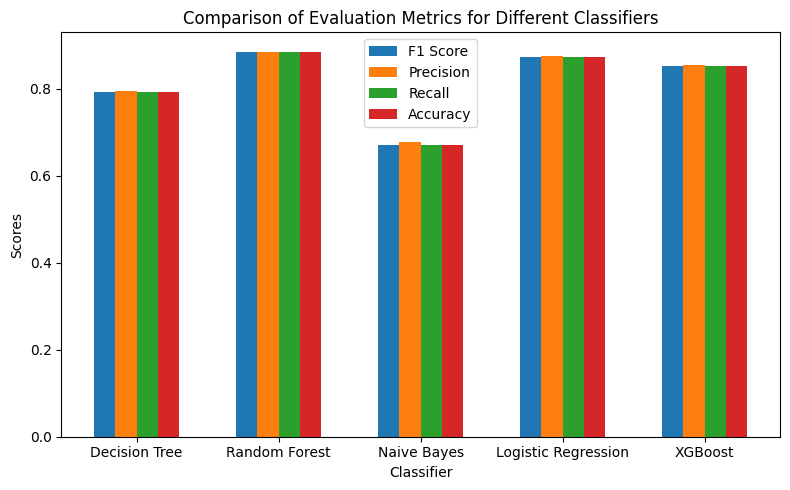

In [154]:
classifiers = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'XGBoost']
metrics = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

f1_scores = [dtrer_ev['F1 Score'], rfc_ev['F1 Score'], nb_ev['F1 Score'], log_ev['F1 Score'], xgb_ev['F1 Score']]
precision_scores = [dtrer_ev['Precision'], rfc_ev['Precision'], nb_ev['Precision'], log_ev['Precision'], xgb_ev['Precision']]
recall_scores = [dtrer_ev['Recall'], rfc_ev['Recall'], nb_ev['Recall'], log_ev['Recall'], xgb_ev['Recall']]
accuracy_scores = [dtrer_ev['Accuracy'], rfc_ev['Accuracy'], nb_ev['Accuracy'], log_ev['Accuracy'], xgb_ev['Accuracy']]

# Plot all evaluation metrics in one graph
plt.figure(figsize=(8, 5))

bar_width = 0.15
index = np.arange(len(classifiers))

plt.bar(index - 1.5 * bar_width, f1_scores, bar_width, label='F1 Score')
plt.bar(index - 0.5 * bar_width, precision_scores, bar_width, label='Precision')
plt.bar(index + 0.5 * bar_width, recall_scores, bar_width, label='Recall')
plt.bar(index + 1.5 * bar_width, accuracy_scores, bar_width, label='Accuracy')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Comparison of Evaluation Metrics for Different Classifiers')
plt.xticks(index, classifiers)
plt.legend()

plt.tight_layout()
plt.show()

#### XGBOOST